# <p align="center"><u> Transformada discreta de Fourier</p></u>


En este documento encontrará el análisis de movimiento para el problema planteado en la primera asignación de Mecáncia Clásica

El código está diseñado para analizar el movimiento variando únicamente las constantes del problema y sus condiciones iniciales.

### <i><font size="5"> Análisis para oscilaciones generales. </i></font>

In [48]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [117]:
# Definimos las constantes del problema
m1 = 1.0  # masa del primer péndulo (kg)
m2 = 1.0  # masa del segundo péndulo (kg)
l1 = 1.0  # longitud de la varilla del primer péndulo (m)
l2 = 1.0  # longitud de la varilla del segundo péndulo (m)
k = 1.0  # constante elástica del resorte (N/m)
g = 9.81  # aceleración debido a la gravedad (m/s^2)

# Condiciones iniciales: ángulos y velocidades angulares iniciales
θ1_0 = np.pi / 15 # ángulo inicial del primer péndulo (radianes)
ω1_0 = 0.0        # velocidad angular inicial del primer péndulo (rad/s)
θ2_0 = np.pi / 15 # ángulo inicial del segundo péndulo (radianes)
ω2_0 = 0.0        # velocidad angular inicial del segundo péndulo (rad/s)

dt = 0.01 #Tiempo de Muestreo
Fs = 1.0 / dt #Frecuencia de Muestreo

In [118]:
def ecuaciones_generales(t, y):
    θ1, ω1, θ2, ω2 = y
    # Ecuaciones de movimiento obtenidas del sistema de péndulos acoplados
    dθ1_dt = ω1
    dω1_dt = ((m1 * g) * np.sin(θ1) - (k * l1 * l2) * (np.sin(θ1-θ2))) / (m1 * l1**2)
    dθ2_dt = ω2
    dω2_dt = ((m2 * g) * np.sin(θ2) + (k * l1 * l2) * (np.sin(θ1-θ2))) / (m2 * l2**2)
    return [dθ1_dt, dω1_dt, dθ2_dt, dω2_dt]

In [119]:
# Tiempo de integración
t_span = (0, 50)  # tiempo de simulación en segundos
t_eval = np.linspace(*t_span, 1000)  # tiempos en los que se evalúa la solución

# Resolver el sistema de ecuaciones diferenciales
sol = solve_ivp(ecuaciones_generales, t_span, [θ1_0, ω1_0, θ2_0, ω2_0], t_eval=t_eval, method="RK45")

# Extraer las soluciones
θ1_sol = sol.y[0]
θ2_sol = sol.y[2]

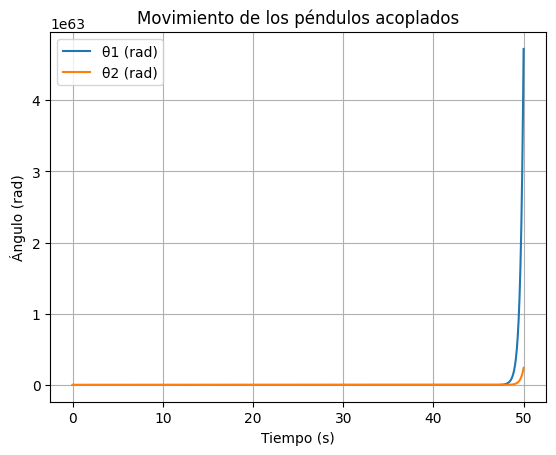

In [126]:
# Graficar los resultados
plt.plot(sol.t, θ1_sol, label='θ1 (rad)') #Solución para θ1
plt.plot(sol.t, θ2_sol, label='θ2 (rad)') #Solución para θ2
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Movimiento de los péndulos acoplados')
plt.legend()
plt.grid(True)
plt.show()

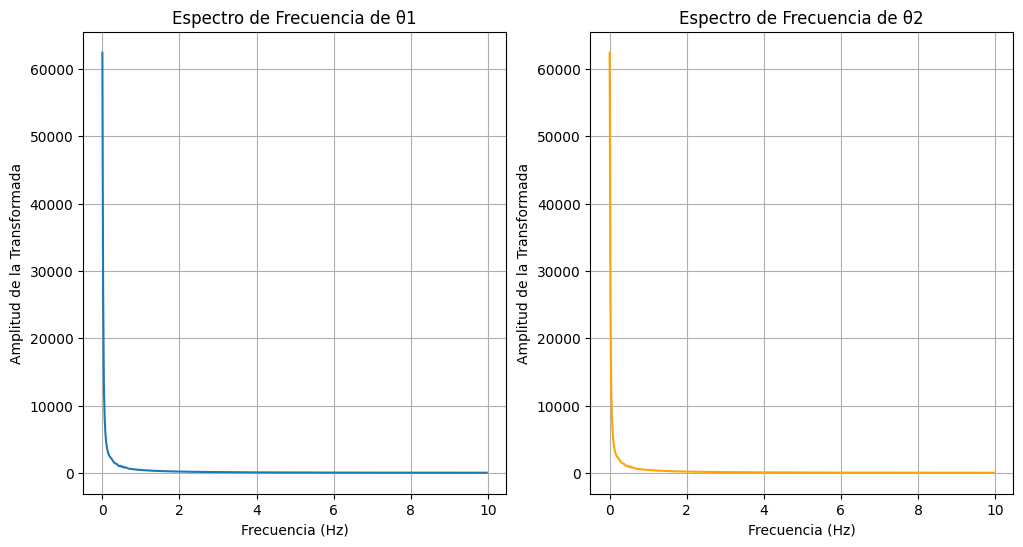

La frecuencia de oscilación dominante para el pendulo 1 es:  [0.] Hz
La frecuencia de oscilación dominante para el pendulo 2 es:  [0.] Hz


In [121]:
# Transformada Discreta de Fourier
FFTsol0 = abs(fft(sol.y[0]))  # Valor absoluto de la transformada para θ1
FFTsol2 = abs(fft(sol.y[2]))  # Valor absoluto de la transformada para θ2

# Vector de frecuencias
F = np.fft.fftfreq(len(FFTsol0), d=(t_eval[1] - t_eval[0]))  # Frecuencias correspondientes

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

## Transformada para θ1
axs[0].plot(F[:len(F)//2], FFTsol0[:len(FFTsol0)//2], label='θ1 (rad)')
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].set_ylabel('Amplitud de la Transformada')
axs[0].set_title('Espectro de Frecuencia de θ1')
axs[0].grid(True)

#Transformada para θ2
axs[1].plot(F[:len(F)//2], FFTsol2[:len(FFTsol2)//2], label='θ2 (rad)', color='orange')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Amplitud de la Transformada')
axs[1].set_title('Espectro de Frecuencia de θ2')
axs[1].grid(True)

plt.show()

print(f"La frecuencia de oscilación dominante para el pendulo 1 es: ", F[np.where(FFTsol0 == np.max(FFTsol0))], "Hz")
print(f"La frecuencia de oscilación dominante para el pendulo 2 es: ", F[np.where(FFTsol2 == np.max(FFTsol2))], "Hz")

### <i><font size="5"> Análisis para pequeñas oscilaciones. </i></font>

In [122]:
def ecuaciones_po(t, y):
    θ1, ω1, θ2, ω2 = y
    # Ecuaciones de movimiento obtenidas del sistema de péndulos acoplados
    dθ1_dt = ω1
    dω1_dt = ((m1 * g) * θ1 - (k * l1 * l2) * (θ1 - θ2)) / (m1 * l1**2)
    dθ2_dt = ω2
    dω2_dt = (-(m2 * g) * θ2 + (k * l1 * l2) * (θ1 - θ2)) / (m2 * l2**2)
    return [dθ1_dt, dω1_dt, dθ2_dt, dω2_dt]

In [123]:
# Tiempo de integración
t_span = (0, 50)  # tiempo de simulación en segundos
t_eval = np.linspace(*t_span, 1000)  # tiempos en los que se evalúa la solución

# Resolver el sistema de ecuaciones diferenciales
sol = solve_ivp(ecuaciones_po, t_span, [θ1_0, ω1_0, θ2_0, ω2_0], t_eval=t_eval, method="RK45")

# Extraer las soluciones
θ1_sol = sol.y[0]
θ2_sol = sol.y[2]

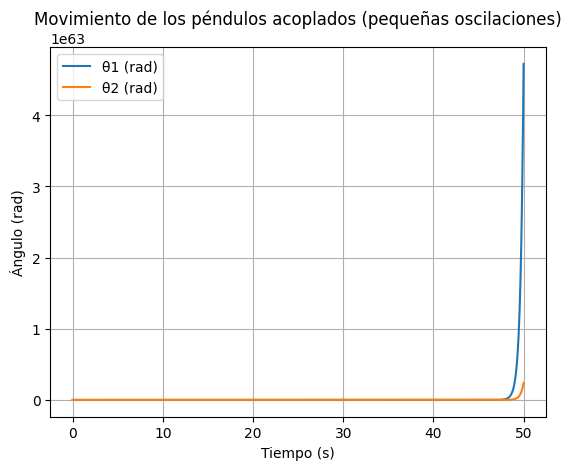

In [124]:
# Graficar los resultados
plt.plot(sol.t, θ1_sol, label='θ1 (rad)')
plt.plot(sol.t, θ2_sol, label='θ2 (rad)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Movimiento de los péndulos acoplados (pequeñas oscilaciones)')
plt.legend()
plt.grid(True)
plt.show()

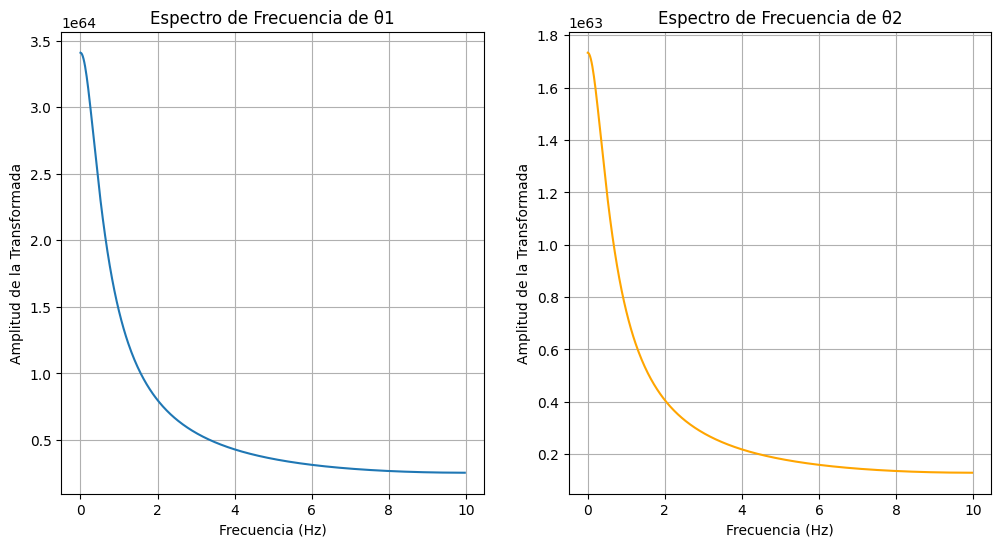

La frecuencia de oscilación dominante para el pendulo 1 es:  [0.] Hz
La frecuencia de oscilación dominante para el pendulo 2 es:  [0.] Hz


In [127]:
# Transformada Discreta de Fourier
FFTsol0 = abs(fft(sol.y[0]))  # Valor absoluto de la transformada
FFTsol2 = abs(fft(sol.y[2]))

# Vector de frecuencias
F = np.fft.fftfreq(len(FFTsol0), d=(t_eval[1] - t_eval[0]))  # Frecuencias correspondientes

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Transformada para θ1
axs[0].plot(F[:len(F)//2], FFTsol0[:len(FFTsol0)//2], label='θ1 (rad)')
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].set_ylabel('Amplitud de la Transformada')
axs[0].set_title('Espectro de Frecuencia de θ1')
axs[0].grid(True)

#Transformada para θ2
axs[1].plot(F[:len(F)//2], FFTsol2[:len(FFTsol2)//2], label='θ2 (rad)', color='orange')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Amplitud de la Transformada')
axs[1].set_title('Espectro de Frecuencia de θ2')
axs[1].grid(True)

plt.show()

print(f"La frecuencia de oscilación dominante para el pendulo 1 es: ", F[np.where(FFTsol0 == np.max(FFTsol0))], "Hz")
print(f"La frecuencia de oscilación dominante para el pendulo 2 es: ", F[np.where(FFTsol2 == np.max(FFTsol2))], "Hz")